# Feature 1:concentration的计算 

from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d as p3d
import heapq
import xlwt

In [6]:
df = pd.read_excel(r"C:\Users\MAC\Desktop\finished_data.xls") #load the dataset
df.drop(["number","price","category"],axis=1,inplace=True)
df.head()

,laptitude,longitude
0,22.566142,113.980837
1,22.686205,113.940525
2,22.576512,113.957198
3,22.564841,114.244571
4,22.558888,113.950723


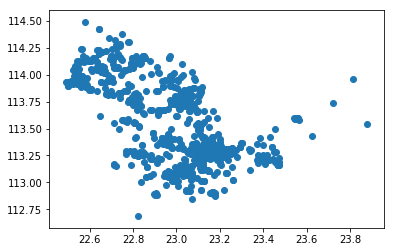

In [13]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [14]:
df['concentration']=None
df.head()

,laptitude,longitude,concentration
0,22.566142,113.980837,None
1,22.686205,113.940525,None
2,22.576512,113.957198,None
3,22.564841,114.244571,None
4,22.558888,113.950723,None


In [18]:
data = df.values[:, 0:3]
print(data)

[[22.566142254795 113.980836777953 None]
 [22.6862052598878 113.940525211308 None]
 [22.5765118283363 113.95719800411 None]
 ...
 [22.8146759735082 113.827731195748 None]
 [23.0636739781751 113.771188397476 None]
 [23.1232943054161 113.110382335887 None]]


In [99]:
def d2(P,Q):
    sum=0
    for i in range (1):
        
        sum+=(float(P[i])-float(Q[i]))**2
    return sum

In [53]:
#index是某个点在dataset中的序列号
def concentration(point_index,data_mtx):
    distance=[]
    dataset2=deepcopy(data_mtx)
    dataset2=np.delete(dataset2,point_index,axis=0)
    
    for i in range(len(dataset2)):
        distance.append(d2(list(data_mtx[point_index]),list(dataset2[i])))
    small_10=heapq.nsmallest(10,distance)
    return sum(small_10)/10

In [103]:
for i in df.index:
    df.iloc[i,2]=concentration(i,data)
df

,laptitude,longitude,concentration,concentration_rank,distance_to_customer
0,22.566142,113.980837,1.16476,4.277028e-07,None
1,22.686205,113.940525,0.921536,2.673967e-06,None
2,22.576512,113.957198,1.14262,4.748009e-06,None
3,22.564841,114.244571,1.16756,1.806610e-06,None
4,22.558888,113.950723,1.18038,7.038898e-07,None
5,22.558999,114.241317,1.18014,7.097763e-07,None
6,22.549004,113.972260,1.20184,6.883976e-07,None
7,22.562774,113.956574,1.172,1.950613e-06,None
8,22.500012,113.895661,1.31105,9.279042e-05,None
9,22.543786,113.923978,1.21324,2.848010e-06,None


In [104]:
df['concentration_rank']=df['concentration'].rank(axis=0,ascending=False)
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer
0,22.566142,113.980837,1.16476,56.0,None
1,22.686205,113.940525,0.921536,148.0,None
2,22.576512,113.957198,1.14262,61.0,None
3,22.564841,114.244571,1.16756,55.0,None
4,22.558888,113.950723,1.18038,45.0,None


In [78]:
df.to_excel('concentration.xls')

# Feature2: 离得最近的10个客户的距离之和

In [81]:
df['distance_to_customer']=None
df

,laptitude,longitude,concentration,concentration_rank,distance_to_customer
0,22.566142,113.980837,1.16476,56.0,None
1,22.686205,113.940525,0.921536,148.0,None
2,22.576512,113.957198,1.14262,61.0,None
3,22.564841,114.244571,1.16756,55.0,None
4,22.558888,113.950723,1.18038,45.0,None
5,22.558999,114.241317,1.18014,46.0,None
6,22.549004,113.972260,1.20184,40.0,None
7,22.562774,113.956574,1.172,49.0,None
8,22.500012,113.895661,1.31105,9.0,None
9,22.543786,113.923978,1.21324,32.0,None


In [124]:
df2 = pd.read_excel(r"C:\Users\MAC\Desktop\试题\2017\B\customers.xlsx") #load the dataset
df2.drop("customer_number",axis=1,inplace=True)
df2.head()

,customer_position,quota,starting_point,credit
0,22.947097 113.679983,114,06:30:00,67997.3868
1,22.577792 113.966524,163,06:30:00,37926.5416
2,23.192458 113.347272,139,06:30:00,27953.0363
3,23.255965 113.31875,98,06:30:00,25085.6986
4,33.65205 116.97047,66,06:30:00,20919.0667


In [90]:
data2 = df2.values[:, 0:4]
print(data2)

[['22.947097 113.679983' 114 datetime.time(6, 30) 67997.3868]
 ['22.577792 113.966524' 163 datetime.time(6, 30) 37926.5416]
 ['23.192458 113.347272' 139 datetime.time(6, 30) 27953.0363]
 ...
 ['23.333446 113.301736' 1 datetime.time(8, 0) 0.0062]
 ['22.693506 113.994101' 1 datetime.time(8, 0) 0.0036]
 ['23.133238 113.239864' 1 datetime.time(8, 0) 0.0001]]


In [107]:
#index是某个点在dataset中的序列号
def distance_to_customer(point_index):
    distance=[]
    for i in range(len(data2)):
        customer_position=list(data2[i])[0].split()
        distance.append(d2(data[point_index],customer_position))
    small_10=heapq.nsmallest(10,distance)
    return sum(small_10)

In [108]:
for i in df.index:
    df.iloc[i,4]=distance_to_customer(i)
df

,laptitude,longitude,concentration,concentration_rank,distance_to_customer
0,22.566142,113.980837,1.16476,56.0,4.27703e-06
1,22.686205,113.940525,0.921536,148.0,2.67397e-05
2,22.576512,113.957198,1.14262,61.0,4.74801e-05
3,22.564841,114.244571,1.16756,55.0,1.80661e-05
4,22.558888,113.950723,1.18038,45.0,7.0389e-06
5,22.558999,114.241317,1.18014,46.0,7.09776e-06
6,22.549004,113.972260,1.20184,40.0,6.88398e-06
7,22.562774,113.956574,1.172,49.0,1.95061e-05
8,22.500012,113.895661,1.31105,9.0,0.000927904
9,22.543786,113.923978,1.21324,32.0,2.84801e-05


# Feature3:离得最近的10个客户的信誉和

In [109]:
df['customer_credit']=None
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer,customer_credit
0,22.566142,113.980837,1.16476,56.0,4.27703e-06,None
1,22.686205,113.940525,0.921536,148.0,2.67397e-05,None
2,22.576512,113.957198,1.14262,61.0,4.74801e-05,None
3,22.564841,114.244571,1.16756,55.0,1.80661e-05,None
4,22.558888,113.950723,1.18038,45.0,7.0389e-06,None


In [125]:
for i in df.index:
    distance={}
    for j in range(len(data2)):
        customer_position=list(data2[j])[0].split()
        distance[j]=(d2(data[i],customer_position))
    distance = sorted(distance.items(),key=lambda item:item[1],reverse=False)
    distance=distance[:10]
    customer_credit=0
    for j in range(10):
        customer_credit+=df2.loc[distance[j][0],'credit']
    df.loc[i,'customer_credit']=customer_credit

In [126]:
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer,customer_credit
0,22.566142,113.980837,1.16476,56.0,4.27703e-06,590.975
1,22.686205,113.940525,0.921536,148.0,2.67397e-05,301.73
2,22.576512,113.957198,1.14262,61.0,4.74801e-05,45137.6
3,22.564841,114.244571,1.16756,55.0,1.80661e-05,921.735
4,22.558888,113.950723,1.18038,45.0,7.0389e-06,953.153


# 限额的和

In [127]:
df['customer_quota']=None
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer,customer_credit,customer_quota
0,22.566142,113.980837,1.16476,56.0,4.27703e-06,590.975,None
1,22.686205,113.940525,0.921536,148.0,2.67397e-05,301.73,None
2,22.576512,113.957198,1.14262,61.0,4.74801e-05,45137.6,None
3,22.564841,114.244571,1.16756,55.0,1.80661e-05,921.735,None
4,22.558888,113.950723,1.18038,45.0,7.0389e-06,953.153,None


In [128]:
for i in df.index:
    distance={}
    for j in range(len(data2)):
        customer_position=list(data2[j])[0].split()
        distance[j]=(d2(data[i],customer_position))
    distance = sorted(distance.items(),key=lambda item:item[1],reverse=False)
    distance=distance[:10]
    customer_quota=0
    for j in range(10):
        customer_quota+=df2.loc[distance[j][0],'quota']
    df.loc[i,'customer_quota']=customer_quota

In [129]:
df.head()

,laptitude,longitude,concentration,concentration_rank,distance_to_customer,customer_credit,customer_quota
0,22.566142,113.980837,1.16476,56.0,4.27703e-06,590.975,39
1,22.686205,113.940525,0.921536,148.0,2.67397e-05,301.73,28
2,22.576512,113.957198,1.14262,61.0,4.74801e-05,45137.6,283
3,22.564841,114.244571,1.16756,55.0,1.80661e-05,921.735,48
4,22.558888,113.950723,1.18038,45.0,7.0389e-06,953.153,47


In [130]:
df.to_excel('features.xls')